In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

X,y=make_blobs(random_state=1)

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [2]:
print('Cluster memberships: \n {}'.format(kmeans.labels_))

Cluster memberships: 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [3]:
print('Cluster predictions: \n {}'.format(kmeans.predict(X)))

Cluster predictions: 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


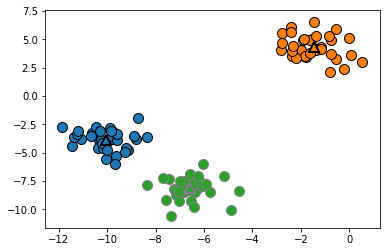

In [6]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2], markers='^',markeredgewidth=2)
plt.show()

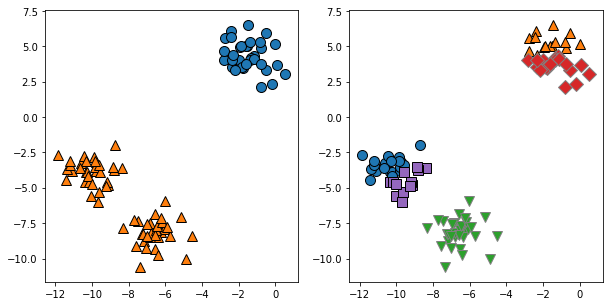

In [7]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
assignments=kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])

kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
assignments=kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])
plt.show()

In [8]:
#lets look at failure cases

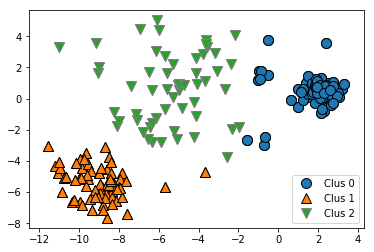

In [10]:
X_varied,y_varied=make_blobs(n_samples=200,cluster_std=[1,2.5,.5],random_state=170)
y_pred=KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(['Clus 0','Clus 1','Clus 2'],loc='best')
plt.show()

In [11]:
#note k_means assumes all directions are equally important

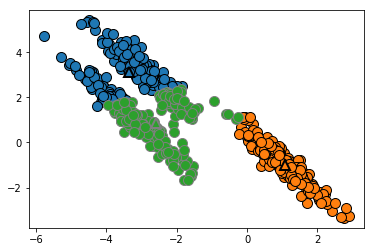

In [12]:
X,y=make_blobs(random_state=170,n_samples=600)
rng=np.random.RandomState(74)

#transform data to be stretched
transformation=rng.normal(size=(2,2))
X=np.dot(X,transformation)

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2], markers='^',markeredgewidth=2)
plt.show()

In [13]:
#kmeans fails to identify non-spherical clusters

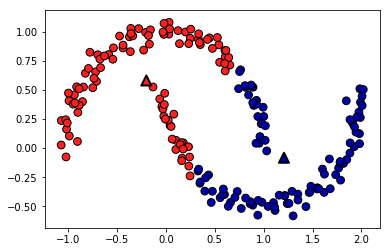

In [16]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_pred=kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60,edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',
            c=[mglearn.cm2(0),mglearn.cm2(1)],s=100,linewidth=2,edgecolor='k')
plt.show()

In [17]:
#kmeans fails to identify complex shaped clusters

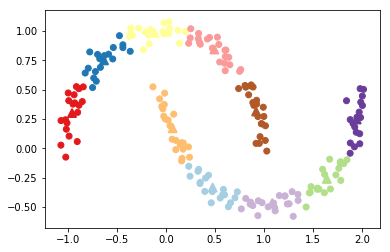

Cluster predictions: 
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [19]:
kmeans=KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
y_pred=kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',
            c=range(kmeans.n_clusters),s=60,linewidth=2,cmap='Paired')
plt.show()
print('Cluster predictions: \n {}'.format(y_pred))

In [21]:
distance_features=kmeans.transform(X)
print('dis feat shape: {}'.format(distance_features.shape))
print('dis features: \n {}'.format(distance_features))

dis feat shape: (200, 10)
dis features: 
 [[ 0.9220768   1.46553151  1.13956805 ...,  1.16559918  1.03852189
   0.23340263]
 [ 1.14159679  2.51721597  0.1199124  ...,  0.70700803  2.20414144
   0.98271691]
 [ 0.78786246  0.77354687  1.74914157 ...,  1.97061341  0.71561277
   0.94399739]
 ..., 
 [ 0.44639122  1.10631579  1.48991975 ...,  1.79125448  1.03195812
   0.81205971]
 [ 1.38951924  0.79790385  1.98056306 ...,  1.97788956  0.23892095
   1.05774337]
 [ 1.14920754  2.4536383   0.04506731 ...,  0.57163262  2.11331394
   0.88166689]]
